In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Densité spectrale du bruit d'une machine à laver

In [2]:
from scipy.io.wavfile import read
samplerate, amplitude = read('data/machine_a_laver.wav')

In [3]:
print(samplerate)
delta_t = 1/samplerate
N = len(amplitude)
print(N)
T = N*delta_t
print(T)

44100
414380
9.396371882086168


Text(0, 0.5, 'Amplitude')

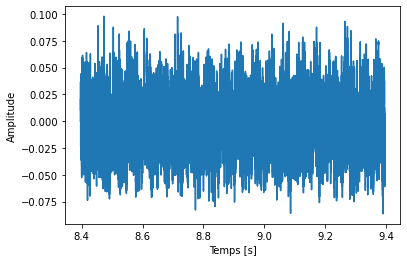

In [4]:
t = np.arange(N)*delta_t

plt.plot(t[-samplerate:], amplitude[-samplerate:])
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')

In [5]:
from scipy.signal import periodogram
freq, psd = periodogram(amplitude, samplerate)

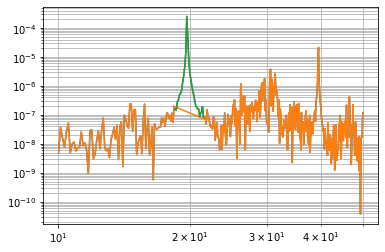

In [6]:
mask = (freq>=10) & (freq<50)
plt.loglog(freq[mask], psd[mask])
plt.grid(which='both')

mask_pic = np.abs(freq-20)<1.5

plt.loglog(freq[mask& ~mask_pic], psd[mask& ~mask_pic])
plt.loglog(freq[mask_pic], psd[mask_pic])


In [7]:
print(np.var(amplitude))

Delta_f = 1/T
print(np.sum(psd)*Delta_f)

0.0006080771214276875
0.0006080771214276876


In [8]:
print('Signal', np.sum(psd[mask_pic]*Delta_f))
print('Bruit', np.sum(psd[~mask_pic])*Delta_f)

Signal 3.569248786907483e-05
Bruit 0.0005723846335586126


In [9]:
Delta_f = freq[1] - freq[0]
print(Delta_f, 1/T)

0.10642405521502003 0.10642405521502003


In [10]:
Delta_f = freq[1] - freq[0]
print(Delta_f, 1/T)

0.10642405521502003 0.10642405521502003


In [11]:
np.std(amplitude)

0.024659219805737723

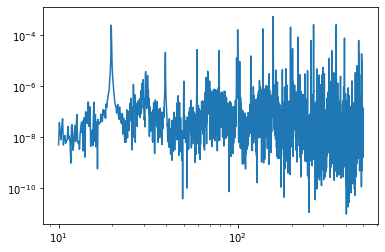

In [12]:
mask = (freq>=10) & (freq<500)
plt.loglog(freq[mask], psd[mask])

## Filtre en Python

In [13]:
np.std(amplitude)

0.024659219805737723

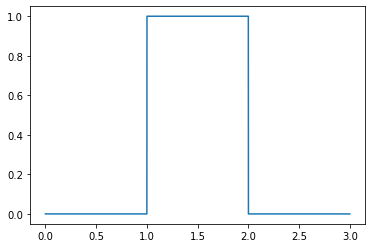

In [14]:
samplerate = 44100
delta_t = 1/samplerate
signal = np.zeros(samplerate*3)
signal[samplerate:samplerate*2] = 1
t = np.arange(len(signal))*delta_t
plt.plot(t, signal)

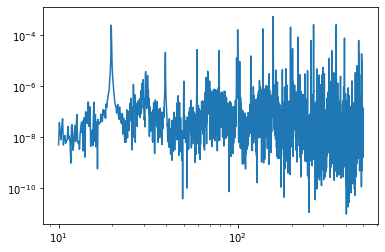

In [15]:
mask = (freq>=10) & (freq<500)
plt.loglog(freq[mask], psd[mask])


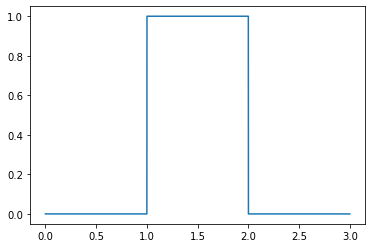

In [16]:
import numpy as np
signal_tilde = np.fft.rfft(signal)
signal_2 = np.fft.irfft(signal_tilde)
plt.plot(t, signal_2)

In [17]:
np.fft.rfftfreq(len(signal), d=delta_t)
# 1/T => samplerate/2

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       2.20493333e+04, 2.20496667e+04, 2.20500000e+04])

In [18]:
def pass_bas(signal, f_c, samplerate=44100):
    signal_tilde = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
    H = 1/(1+1J*(freqs/f_c))
    signal_2 = np.fft.irfft(H*signal_tilde)
    return signal_2

In [19]:
def pass_haut(signal, f_c, samplerate=44100):
    signal_tilde = np.fft.rfft(signal)
    freqs = np.fft.rfftfreq(len(signal), 1/samplerate)
    H = 1J*(freqs/f_c)/(1+1J*(freqs/f_c))
    signal_2 = np.fft.irfft(H*signal_tilde)
    return signal_2

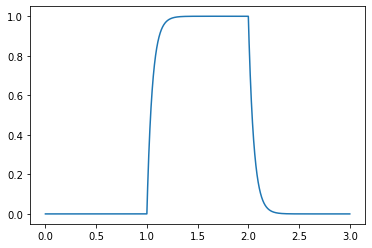

In [20]:
signal_filtre = pass_bas(signal, f_c=3)
plt.plot(t, signal_filtre)

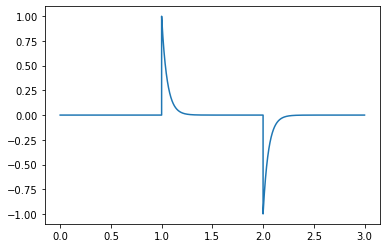

In [21]:
signal_filtre = pass_haut(signal, f_c=3)
plt.plot(t, signal_filtre)

In [36]:
from scipy.io.wavfile import read
samplerate, amplitude = read('data/machine_a_laver.wav')

amplitude_filtree = pass_haut(pass_bas(amplitude, 30, samplerate=samplerate),15, samplerate=samplerate)

Text(0, 0.5, 'Amplitude')

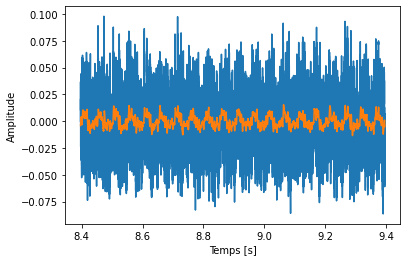

In [37]:
t = np.arange(N)*delta_t

plt.plot(t[-44100:], amplitude[-44100:])
plt.plot(t[-44100:], amplitude_filtree[-44100:])
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')

## Onde gravitationnelle

In [24]:
from readligo import loaddata
filename_H1 = 'data/H-H1_LOSC_4_V1-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = loaddata(filename_H1, 'H1')

In [25]:
from readligo import loaddata
filename_H1 = 'data/H-H1_LOSC_4_V1-1126259446-32.hdf5'
strain_H1, time_H1, chan_dict_H1 = loaddata(filename_H1, 'H1')

filename_L1 = 'data/L-L1_LOSC_4_V1-1126259446-32.hdf5'
strain_L1, time_L1, chan_dict_L1 = loaddata(filename_L1, 'L1')

time = time_H1
print(len(time))
dt = time[1] - time[0]
print(dt)
samplerate = int(1/dt)

131072
0.000244140625


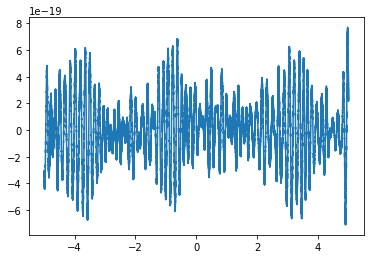

In [26]:
# plot +- 5 seconds around the event:
tevent = 1126259462         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 5              # seconds around the event

# index into the strain time series for this time interval:
mask = ((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

# index into the strain time series for this time interval:
mask = ((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

plt.plot(time_H1[mask] - tevent, strain_H1[mask])

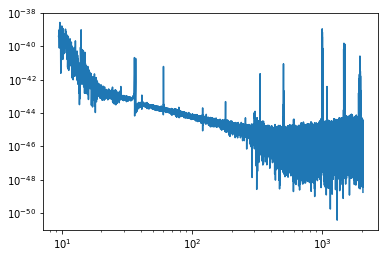

In [27]:
from scipy.signal import periodogram
f_p, psd_p = periodogram(strain_H1, samplerate)

plt.loglog(f_p[300:], psd_p[300:])

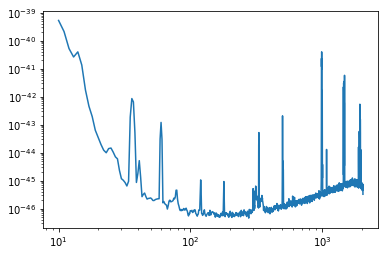

In [28]:
from scipy.signal import welch
f, psd = welch(strain_H1, samplerate, nperseg=samplerate)

plt.loglog(f[10:], psd[10:])

[8.51792826e-47]
2.2741360676158992e-39
4.879306747538016e-38


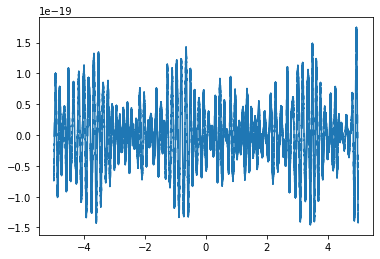

In [29]:
print(psd[f==100])

strain_H1_filt = pass_haut(pass_bas(strain_H1, f_c=300, samplerate=1/dt), f_c=30, samplerate=1/dt)

# plot +- 5 seconds around the event:
tevent = 1126259462      # Mon Sep 14 09:50:45 GMT 2015 
deltat = 5               # seconds around the event

# index into the strain time series for this time interval:
mask = ((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

plt.plot(time_H1[mask] - tevent, strain_H1_filt[mask])

# Variance du signal filtré et non filtré
print(np.var(strain_H1_filt))
print(np.var(strain_H1))


In [30]:
from scipy.interpolate import interp1d    

def whiten(strain, dt):
    freqs_welch, psd_welch = welch(strain, fs=1/dt, nperseg=int(1/dt))
    interp_psd = interp1d(freqs_welch, psd_welch)

    strain_tilde = np.fft.rfft(strain)
    N = len(strain)
    freqs = np.fft.rfftfreq(N, dt)

    gain = 1 / np.sqrt(interp_psd(freqs))
    gain = gain/gain.max()
    white_strain_tilde = strain_tilde * gain
    white_strain = np.fft.irfft(white_strain_tilde)
    return white_strain

In [31]:
strain_H1_whiten = whiten(strain_H1, dt)
strain_L1_whiten = whiten(strain_L1, dt)

6.375591787640518e-43


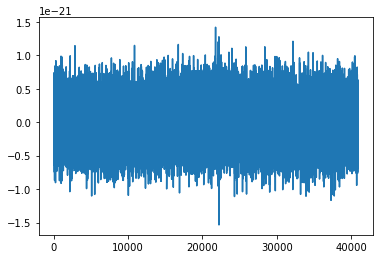

In [32]:
# plot +- 5 seconds around the event:
tevent = 1126259462         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 5.                     # seconds around the event

# index into the strain time series for this time interval:
mask = ((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

plt.plot(strain_H1_whiten[mask])

# Variance du signal sans les oscillations parasites
print(np.var(strain_H1_whiten))

In [33]:
strain_H1_whiten_filt = pass_haut(pass_bas(strain_H1_whiten, f_c=300, samplerate=1/dt), f_c=20, samplerate=1/dt)
strain_L1_whiten_filt = pass_haut(pass_bas(strain_L1_whiten, f_c=300, samplerate=1/dt), f_c=20, samplerate=1/dt)

Text(0.5, 0, 'Temps (s)')

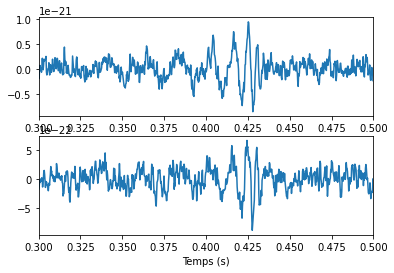

In [34]:
# plot +- 0.5 seconds around the event:
tevent = 1126259462         # Mon Sep 14 09:50:45 GMT 2015 
deltat = 0.5                # seconds around the event

# index into the strain time series for this time interval:
mask = ((time_H1 >= tevent-deltat) & (time_H1 < tevent+deltat))

plt.subplot(2, 1, 1)

plt.plot(time_H1[mask] - tevent, strain_H1_whiten_filt[mask])
plt.xlim(0.3, 0.5)
plt.subplot(2, 1, 2)

delay=0.007
plt.plot(time_L1[mask] - tevent + delay, -strain_L1_whiten_filt[mask])
plt.xlim(0.3, 0.5)

plt.xlabel('Temps (s)')

(0.0, 1.0)

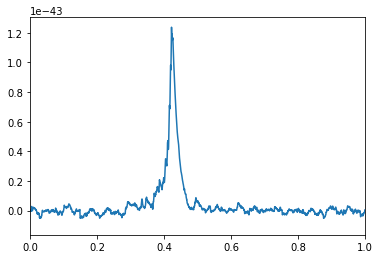

In [35]:
## Question 8
# Correlation avec un délai de 7ms

start = int(len(time)/2 - 2.5*samplerate)
stop = int(len(time)/2 + 2.5*samplerate)
delai = int(7E-3*samplerate)
correlation = -strain_L1_whiten_filt[start:stop] * strain_H1_whiten_filt[start+delai:stop+delai]
correlation_filt = pass_bas(correlation, f_c=10, samplerate=samplerate)
plt.plot(time_L1[start:stop]-tevent, correlation_filt)
plt.xlim(0, 1)